# Tarea Semana 4

## Video de la Semana

[¿Qué es la Visión por Computadora?](https://www.youtube.com/watch?v=LTlZy-OVWkM)

## Podcast Recomendado

https://open.spotify.com/episode/2b9OgoqIsmsDXml2QYWswM?si=25e65169188e4b47

## Lectura Recomendada

Capítulos 2 y 3 del libro: Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow

> Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Media.

## Solución Tarea 3
https://www.kaggle.com/sudohumberto/paris-housing

1. Realice un análisis sobre los datos (distribución, correlación, valores atípicos,...) (5 pts)
2. Utilice el dataset del vino para ajustar al menos 3 modelos diferentes: Simple Linear Regression, Polynomial Linear Regression, Multiple Linear Regression, Logistic Regression, ... (6 pts)
3. Obtenga el AIC de cada modelo (6 pts)
4. Obtenga el BIC de cada modelo (6 pts)
5. ¿Cuál es el modelo mas adecuado y porqué? (2 pts)

# Libraries

In [121]:
import pandas as pd
import numpy as np
#import plotly as plt
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split


# Data Explore

In [122]:
wine = pd.read_csv("data/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [123]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [124]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [125]:
fig = make_subplots(rows=(wine.shape[1]//3)+1, cols=3)

for i, col in enumerate(wine.columns):
    fig.add_trace(go.Histogram(x=wine[col], name=col), row=(i//3)+1, col=(i%3)+1)
    
fig.update_layout(height=1500,)
    
fig.show()

In [126]:
corr_df=wine.corr()

In [127]:
corr_df.style.background_gradient(cmap='plasma').set_precision(2)

<ipython-input-127-06e876118f23>:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


In [128]:
wine.groupby(by = 'quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


# Set Target column

In [129]:
 wine['l_quality'] = np.where(wine['quality'] > 5 ,'Good','Bad') 

In [130]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,l_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


In [131]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import utils

encoder = LabelEncoder()

encoder.fit(wine["l_quality"])

wine["target"] = encoder.transform(wine["l_quality"])
wine






,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,l_quality,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Good,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Good,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Good,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad,0


In [142]:
data = wine.drop(["quality","l_quality","target"], axis=1)

In [143]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [144]:
target=wine['target'].astype('category')

In [145]:
target

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: target, Length: 1599, dtype: category
Categories (2, int64): [0, 1]

# Calculate AIC

In [146]:
from math import log

def calculate_aic(n, mse, num_params):
    '''calculate aic for linear regression'''
    aic = n * log(mse) + 2 * num_params
    return aic

In [147]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# generar el dataset
X=data
y=target
X, y = make_regression(n_samples=50, n_features=3, noise=0.1)

# definir y ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# numero de parametros
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))

# predicciones
yhat = model.predict(X)

# calcular el mean squared error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)

# calcular el AIC
aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 4
MSE: 0.009
AIC: -225.672


In [148]:
from math import log

def calculate_aic(n, logloss, num_params):
    '''calculate aic for logistic regression'''
    aic = (-2/n) * log(logloss) + (2 * (num_params/n))
    return aic

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# obtener el dataset
X=data
y=target

# definir y ajustar el modelo
logmodel = LogisticRegression(random_state=0, max_iter=1000)
logmodel.fit(X, y)

# numero de parametros
num_params = len(logmodel.coef_) + 1
print('Number of parameters: %d' % (num_params))

# predicciones
yhat = logmodel.predict_proba(X)

# calcular el mean squared error
logloss = log_loss(y, yhat)
print('log_loss: %.3f' % logloss)

# calcular el AIC
aic = calculate_aic(len(y), logloss, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 2
log_loss: 0.520
AIC: 0.003


In [151]:
from math import log

def calculate_aic(n, pol_loss, num_params):
    '''calculate aic for logistic regression'''
    aic = (-2/n) * log(pol_loss) + (2 * (num_params/n))
    return aic

In [157]:
from sklearn.preprocessing import PolynomialFeatures
X=data
y=target


# definir y ajustar el modelo
polyreg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
polyreg = LinearRegression()
polyreg.fit(X_poly, y)



# predicciones
#yhat = polyreg.predict_proba(X)

# calcular el mean squared error
pol_loss =  mean_squared_error(y, yhat)
print('log_loss: %.3f' % logloss)

# calcular el AIC
aic = calculate_aic(len(y), logloss, num_params)
print('AIC: %.3f' % aic)

ValueError: y_true and y_pred have different number of output (1!=2)

# Calculate BIC

In [162]:
from math import log

def calculate_bic(n, mse, num_params):
    '''calculate bic for linear regression'''
    bic = n * log(mse) + num_params * log(n)
    return bic

In [163]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# generar el dataset
X=data
y=target
X, y = make_regression(n_samples=50, n_features=3, noise=0.1)

# definir y ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# numero de parametros
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))

# predicciones
yhat = model.predict(X)

# calcular el mean squared error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)

# calcular el AIC
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 4
MSE: 0.007
BIC: -231.365


In [164]:
from math import log

def calculate_bic(n, logloss, num_params):
    '''calculate aic for logistic regression'''
    bic = -2 * log(logloss) + log(n) * num_params
    return bic

In [165]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# obtener el dataset
X=data
y=target

# definir y ajustar el modelo
logmodel = LogisticRegression(random_state=0, max_iter=1000)
logmodel.fit(X, y)

# numero de parametros
num_params = len(logmodel.coef_) + 1
print('Number of parameters: %d' % (num_params))

# predicciones
yhat = logmodel.predict_proba(X)

# calcular el mean squared error
logloss = log_loss(y, yhat)
print('log_loss: %.3f' % logloss)

# calcular el AIC
bic = calculate_bic(len(y), logloss, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 2
log_loss: 0.520
BIC: 16.063


# Pruebas varias

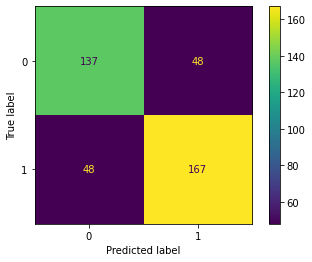

In [170]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,normalize=None)
plt.show()

In [174]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# obtener el dataset
X=data
y=target

# obtener los nombres de las clases
#class_names =y.target_names

# dividir el dataset en entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(X_train, y_train)

In [175]:
from sklearn.metrics import classification_report

y_prima = classifier.predict(X_test)

print(classification_report(y_test, y_prima))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       185
           1       0.78      0.78      0.78       215

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400

